# Unsupervised Classification Analysis
# 03 - QC Kmeans clustering
## Marc Boulet
## Team Transparency, CSE 6242 Spring 2020


This notebook attempts to assess what cluster sizes should be used from the 6  model outputs from the **02 - Kmeans clustering** notebook. 

### Executive summary 
Cluster sizes of 3-5 clusters for all 6 models seem the most stable when plotted against the global innovation index variable. Cluster sizes from 6-8 should probably not be used.  
  
The models using all features are more closely aligned to the global innovation index than the curated datasets. The curated dataset is quite noisy when plotted against the global innovation index, which indicates that it is telling us something quite different.  
  
The non-creative models are also more closely aligned than the creative datasets. That makes sense, as the global innovation index uses primarily economic inputs.  There are definite differences between the creative and non-creative models for both all features and curated features. 

### Output summary

I've plotted the clustering (3-8 clusters) sizes from each of the six models against the global innovation index target variable to assess cluster size stability. The global innovation index variable is only available for 129 of the 271 countries. Generally, most of the 142 countries not represented belong to the clusters that represent low global innovation index values.

### Input summary

Each dataset has three different model outputs:

1) **kmeans_results_all.csv** (all features analyzed together)  
2) **kmeans_results_all_non_creative.csv** (a subset of non_creative features analyzed from the 45-feature dataset)  
3) **kmeans_results_all_creative.csv** (a subset of creative features analyzed from the 45-feature dataset)  

4) **kmeans_results_curated.csv** (all curated features analyzed together)  
5) **kmeans_results_curated_non_creative.csv** (a subset of non_cultural features analyzed from the 20-feature dataset)  
6) **kmeans_results_curated_creative.csv** (a subset of creative features analyzed from the curated 20-feature dataset)  

### Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

### Load k-means results datasets

In [38]:
# load target (global_innovation_index) variable
df_target = pd.read_csv('df_gii_target.csv')
df_target.drop(['country_iso'], axis = 1, inplace = True)

In [39]:
# load all-features models
kmeans_results_all = pd.read_csv('kmeans_results_all.csv')
kmeans_results_all_non_creative = pd.read_csv('kmeans_results_all_non_creative.csv')
kmeans_results_all_creative = pd.read_csv('kmeans_results_all_creative.csv')

In [40]:
# load curated-features models
kmeans_results_curated = pd.read_csv('kmeans_results_curated.csv')
kmeans_results_curated_non_creative = pd.read_csv('kmeans_results_curated_non_creative.csv')
kmeans_results_curated_creative = pd.read_csv('kmeans_results_curated_creative.csv')

In [41]:
# add target variable to all 6 models
kmeans_results_all['global_innovation_index'] = df_target
kmeans_results_all_non_creative['global_innovation_index'] = df_target
kmeans_results_all_creative['global_innovation_index'] = df_target
kmeans_results_curated['global_innovation_index'] = df_target
kmeans_results_curated_non_creative['global_innovation_index'] = df_target
kmeans_results_curated_creative['global_innovation_index'] = df_target

### Plot global_innovation_index vs. cluster_size from 3-8
### for all 6 models

In [131]:
# function to plot dataframe according to cluster_size

def plot_clusters38(dataframe):
    # pivot dataframe from wide to long
    df = pd.melt(dataframe, id_vars=['global_innovation_index'], value_vars=['clusters_3', 'clusters_4', 'clusters_5','clusters_6','clusters_7','clusters_8'], var_name = "cluster_size", value_name = "cluster_value")
    
    # plot dataframe in cluster_size facet grid (small multiples)
    g = sns.FacetGrid(df, col="cluster_size", col_wrap=2, height=3)
    g = g.map(sns.lineplot, "global_innovation_index", "cluster_value", marker = ".")

In [129]:
# every cluster trend on same plot - too confusing!
# plt.figure(figsize=(10,8))
# ax = sns.lineplot(x="global_innovation_index", y="cluster_value", hue = "cluster_size", data=kmeans_results_all_long)

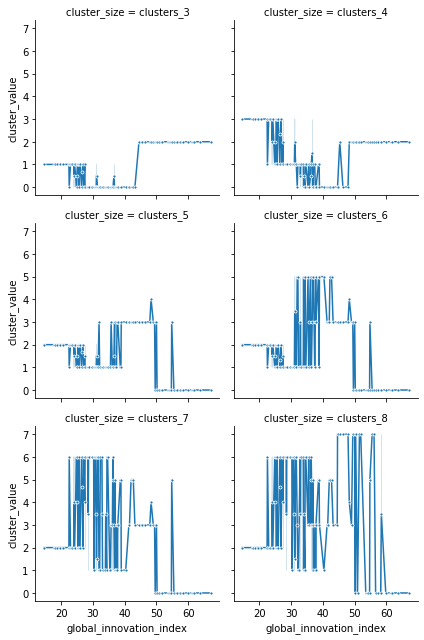

In [134]:
plot_clusters38(kmeans_results_all)

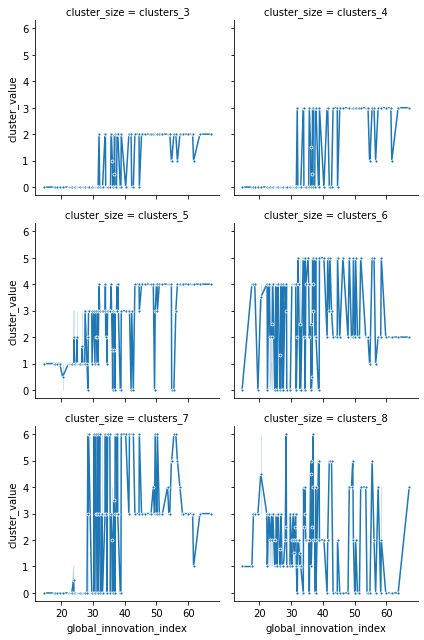

In [135]:
plot_clusters38(kmeans_results_curated)

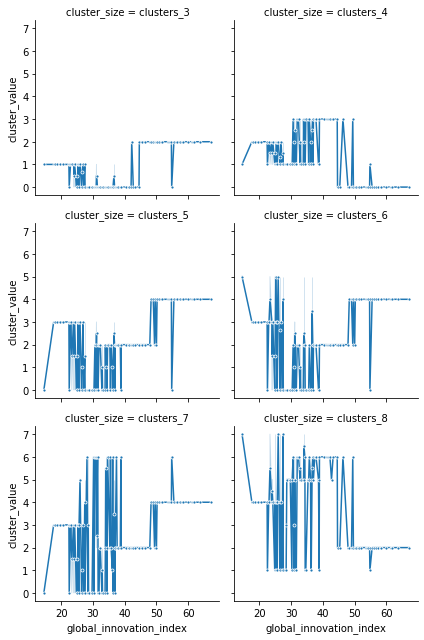

In [136]:
plot_clusters38(kmeans_results_all_non_creative)

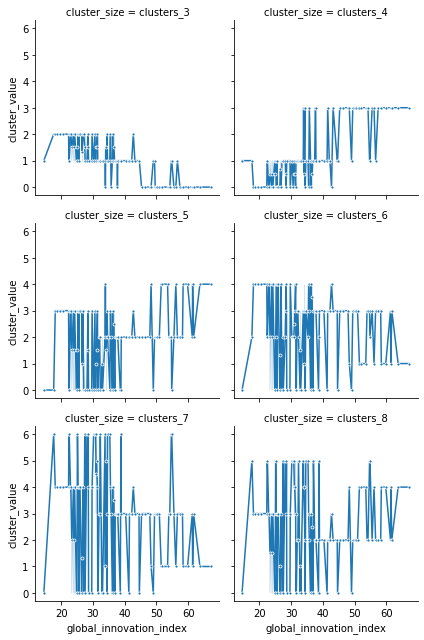

In [137]:
plot_clusters38(kmeans_results_curated_non_creative)

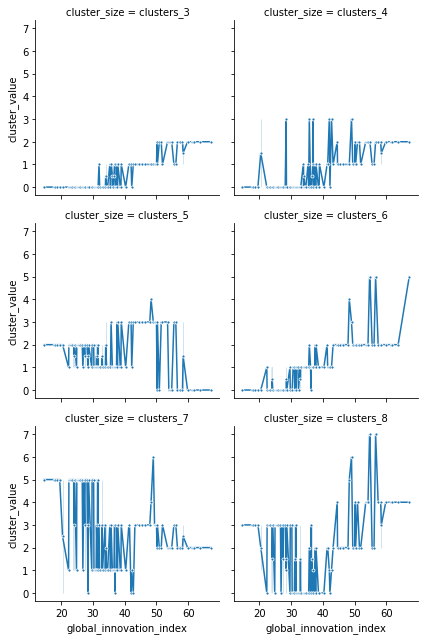

In [138]:
plot_clusters38(kmeans_results_all_creative)

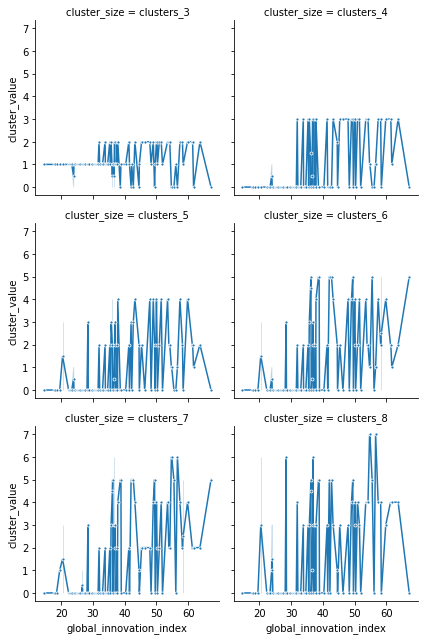

In [139]:
plot_clusters38(kmeans_results_curated_creative)

### Observations
Cluster sizes from 3-5 are more stable than cluster sizes from 6-8. Therefore, I've replotted only cluster_sizes from 3-5 in the next section.

### Plot global_innovation_index vs. cluster_size from 3-5
### for all 6 models

In [140]:
def plot_clusters35(dataframe):
    # pivot dataframe from wide to long
    df = pd.melt(dataframe, id_vars=['global_innovation_index'], value_vars=['clusters_3', 'clusters_4', 'clusters_5'], var_name = "cluster_size", value_name = "cluster_value")
    
    # plot dataframe in cluster_size facet grid (small multiples)
    g = sns.FacetGrid(df, col="cluster_size", col_wrap=3, height=3)
    g = g.map(sns.lineplot, "global_innovation_index", "cluster_value", marker = ".")

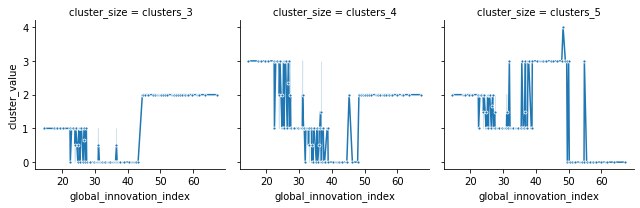

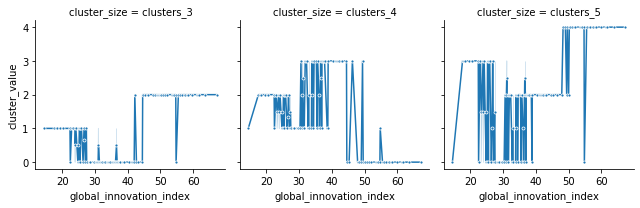

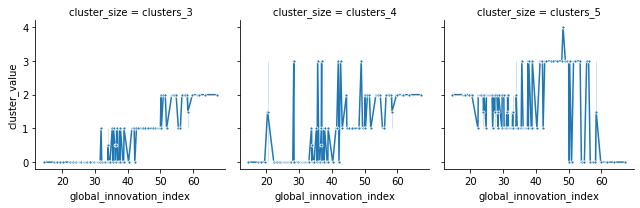

In [151]:
plot_clusters35(kmeans_results_all)
plot_clusters35(kmeans_results_all_non_creative)
plot_clusters35(kmeans_results_all_creative)

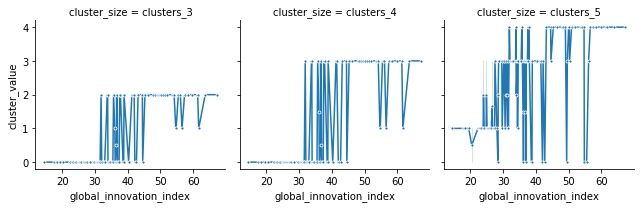

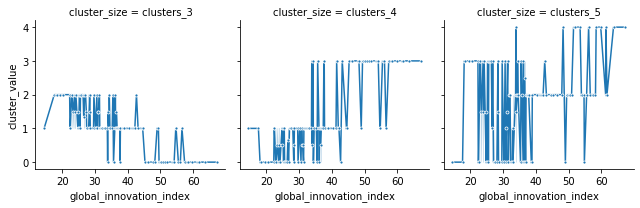

In [153]:
plot_clusters35(kmeans_results_curated)
plot_clusters35(kmeans_results_curated_non_creative)

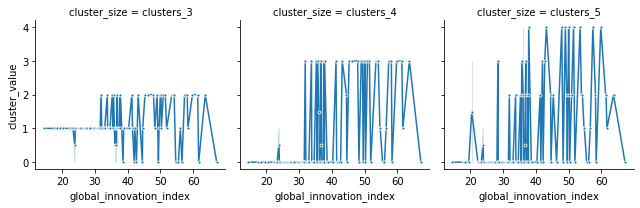

In [154]:
plot_clusters35(kmeans_results_curated_creative)

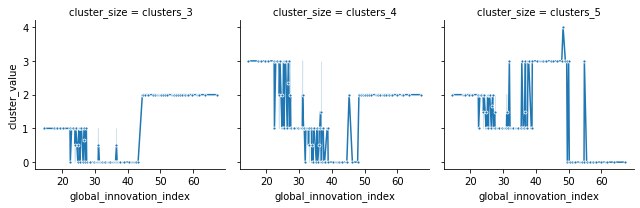

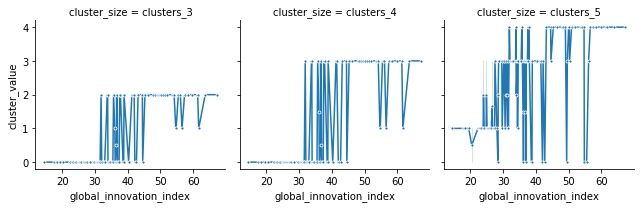

In [155]:
plot_clusters35(kmeans_results_all)
plot_clusters35(kmeans_results_curated)

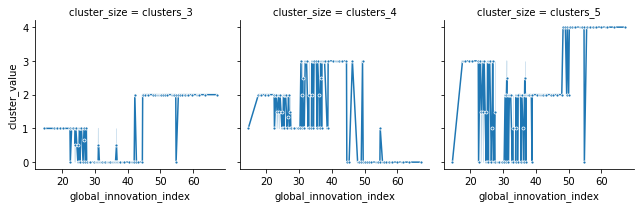

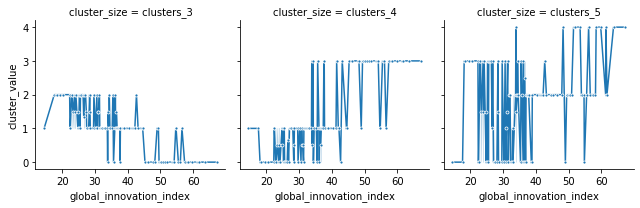

In [156]:
plot_clusters35(kmeans_results_all_non_creative)
plot_clusters35(kmeans_results_curated_non_creative)

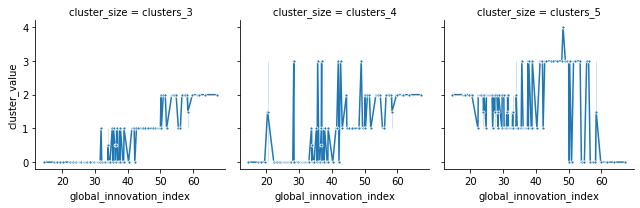

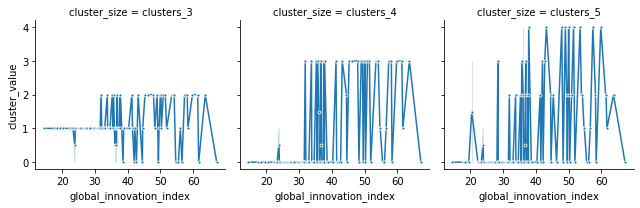

In [157]:
plot_clusters35(kmeans_results_all_creative)
plot_clusters35(kmeans_results_curated_creative)

### Observations
The datasets with all features are most closely aligned with the global innovation index. The curated dataset is quite noisy when plotted against the global innovation index, which indicates that it is telling us something quite different.